<a href="https://colab.research.google.com/github/rafsantos/tcc_colab_py/blob/main/Matriz%20Pintar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# @title Ferramentas
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import requests

#Desenha grade em uma imagem com um determinado intervalo
def grade(img,intervalo):
  img = np.array(img)
  img[::intervalo] = 0
  img[:,::intervalo] = 0
  img = Image.fromarray(img.astype('uint8'),'L')
  return img

def leImagemWeb(url):
  im = Image.open(requests.get(url, stream=True).raw).convert('L')
  return im

#pixelando imagem
def ajustaVisual(img,pixH,fator):
  #compacta primeiro
  img = encolhe(img,pixH)
  img = img.resize((img.size[0]*fator,img.size[1]*fator),resample=Image.NEAREST)
  return img

#Reduz imagem para quantidade de pixels na horizontal
def encolhe(img,pixH):
  img = img.resize((pixH,int(pixH*img.height/img.width)),resample=Image.NEAREST)
  return img

# Escreve os pixels por cima da imagem ajustada a fator
def escrevePixels(img,fator):
  draw = ImageDraw.Draw(img)
  font = ImageFont.load_default()
  img_arr = np.transpose(np.array(img))
  for y in range(0,img_arr.shape[1],fator):
    for x in range(0,img_arr.shape[0],fator):
      txt = str((img_arr)[x,y])
      txtbox = font.getbbox(txt)
      #Alinhando o texto no centro do quadrado
      draw.text((x + fator/2 - txtbox[2]/2, y + fator/2 - txtbox[3]/2 ), txt, anchor='mm')
  return img

# Escreve os pixels por cima da imagem ajustada a fator -
# Saida é imagem em branco com Pixels
def escrevePixelsSemImagem(img,fator):
  img_out = Image.new(mode="L", size=(img.size[0],img.size[1]),color = (255))
  draw = ImageDraw.Draw(img_out)
  font = ImageFont.load_default()

  img_arr = np.transpose(np.array(img))

  for y in range(0,img_arr.shape[1],fator):
    for x in range(0,img_arr.shape[0],fator):
      txt = str((img_arr)[x,y])
      txtbox = font.getbbox(txt)
      #Alinhando o texto no centro do quadrado
      draw.text((x + fator/2 - txtbox[2]/2, y + fator/2 - txtbox[3]/2 ), txt, anchor='mm')
  return img_out

def animacaoGIF(frames_arr,fator):
  #Os frames sao uma lista de imagens de cada frae da animacao
  #Preciso ampliar cada um primeiro
  frames_out = []
  for frame in frames:
    #Para cada frame, vou ampliar e gravar na lista de saida

    frame = frame.resize((frame.size[0]*fator,frame.size[1]*fator),resample=Image.NEAREST)
    #display(frame)
    frames_out.append(frame)
  return frames_out


In [ ]:
# @title Tipo de Filtro
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import requests

dropdown = 'Aresta V 3x3' #@param ["Blur 4x4","Blur 3x3", "Aresta H 3x3", "Aresta V 3x3", "Aresta H 4x4", "Aresta V 4x4"]

if dropdown == 'Blur 3x3':
  filtro = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
    ], dtype=np.float32)/9.0

if dropdown == 'Blur 4x4':
  filtro = np.array([
    [1, 1, 1, 1],
    [1, 1, 1, 1],
    [1, 1, 1, 1],
    [1, 1, 1, 1]
    ], dtype=np.float32)/16.0

if dropdown == 'Aresta H 3x3':
  filtro = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1],
    ], dtype=np.float32)/1.0

if dropdown == 'Aresta V 3x3':
  filtro = np.array([
    [+1,  1,   1],
    [ 0,  0,   0],
    [-1, -1,  -1]
    ], dtype=np.float32)/1.0

if dropdown == 'Aresta H 4x4':
  filtro = np.array([
    [-1, -1, 1, 1],
    [-1, -1, 1, 1],
    [-1, -1, 1, 1],
    [-1, -1, 1, 1]
    ], dtype=np.float32)/1.0

if dropdown == 'Aresta V 4x4':
  filtro = np.array([
    [+10,  10,   10, 10],
    [ 10,  10,   10, 10],
    [-10, -10, -10, -10],
    [-10, -10, -10, -10]
    ], dtype=np.float32)/16.0

In [50]:
fator = 20
pixHoriz = 20
numCores = 4
# Vou obter uma imagem da web
#url = ("https://i.ibb.co/D81PNZz/image.png")

#url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSzFVq9sCTckUxKmHj7YTLlKQH6nkicNS_UQ9XUdvdeLg&s"

#url = 'https://live.staticflickr.com/4830/44200095760_4d993be1cb_b.jpg'

#Mario
#url = "https://p.turbosquid.com/ts-thumb/DK/rVqefa/IdB4aZrN/0/jpg/1408568906/600x600/fit_q87/a2fc0eb49b241e273ed52dec1bd7d3cf63548f8c/0.jpg"

#Cogumelo
url = "https://a0.anyrgb.com/pngimg/2036/1996/super-mushroom-8-bit-duck-hunt-super-mario-maker-super-mario-bros-8bit-super-mario-world-super-mario-bros-toad-mushroom.png"

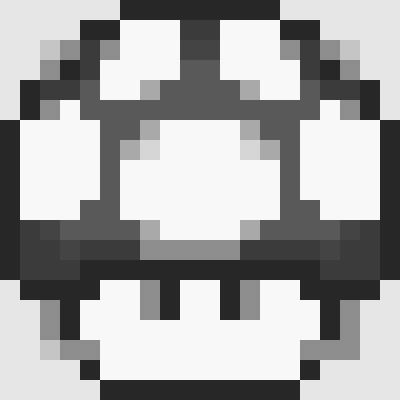

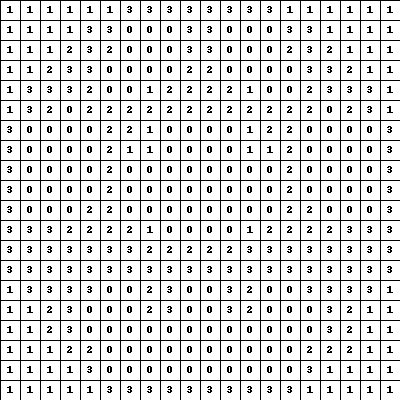

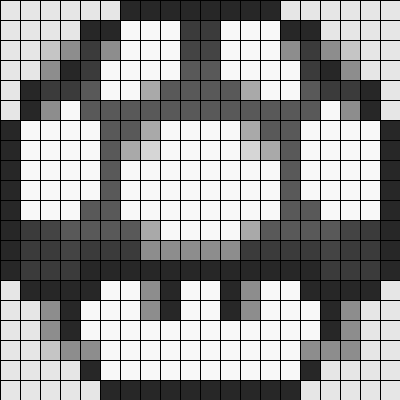

In [52]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont, ImageOps
import requests


##### Funcoes #########
# Função convolução

img = leImagemWeb(url)
img = ajustaVisual(img,pixHoriz,fator)
img = img.convert("L")
display(img)
img = img.quantize(colors=numCores, dither=None)

#Ajustando exibicao da imagem de entrada
img = ajustaVisual(img,pixHoriz,fator)
img = escrevePixelsSemImagem(img,fator)
img = grade(img,fator)
display(img)

#Ajustando exibicao da imagem de entrada
img = leImagemWeb(url)
img = ajustaVisual(img,pixHoriz,fator)
#img = escrevePixels(img,fator)





img = grade(img,fator)
display(img)


